In [1]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('trucks.csv')
df

,seq,type,timestamp,truckId,positionLatitude,positionLongitude,equipType,nextTripLengthPreference
0,15,Truck,2023-11-19T08:12:28,101,34.294167,-85.879997,Reefer,Long
1,16,Truck,2023-11-19T08:19:59,134,39.913216,-86.210175,Flatbed,Short
2,17,Truck,2023-11-19T08:20:41,121,36.077549,-87.120148,Van,Short
3,19,Truck,2023-11-19T08:28:02,106,32.505447,-85.605026,Van,Long
4,20,Truck,2023-11-19T08:29:42,147,35.794121,-86.377892,Flatbed,Long
...,...,...,...,...,...,...,...,...
1995,2496,Truck,2023-11-19T22:58:03,238,42.132271,-72.051010,Reefer,Short
1996,2497,Truck,2023-11-19T22:59:24,353,42.473766,-79.276031,Flatbed,Short
1997,2498,Truck,2023-11-19T22:59:27,290,39.569466,-76.139107,Van,Short
1998,2499,Truck,2023-11-19T22:59:35,241,38.293682,-85.542076,Flatbed,Long


In [2]:
serie = df['truckId'].value_counts()
serie


366    19
106    14
292    14
110    14
331    14
       ..
123     1
400     1
197     1
219     1
222     1
Name: truckId, Length: 322, dtype: int64

In [3]:
df.loc[df['truckId'] == 163]

,seq,type,timestamp,truckId,positionLatitude,positionLongitude,equipType,nextTripLengthPreference
144,230,Truck,2023-11-19T10:13:14,163,39.345943,-84.611092,Van,Long
221,348,Truck,2023-11-19T10:53:18,163,39.058472,-84.469650,Van,Long
988,1450,Truck,2023-11-19T16:09:41,163,39.803234,-83.208191,Van,Long
1092,1575,Truck,2023-11-19T16:49:44,163,40.224995,-82.929070,Van,Long
1215,1709,Truck,2023-11-19T17:29:50,163,40.777355,-82.416084,Van,Long
1418,1912,Truck,2023-11-19T18:38:20,163,41.035187,-81.755264,Van,Long
1466,1961,Truck,2023-11-19T18:53:19,163,41.036072,-81.504890,Van,Long
1816,2316,Truck,2023-11-19T21:20:21,163,41.204025,-79.921600,Van,Long
1893,2393,Truck,2023-11-19T22:00:23,163,41.170616,-79.101173,Van,Long
1952,2452,Truck,2023-11-19T22:30:25,163,41.083035,-78.506371,Van,Long


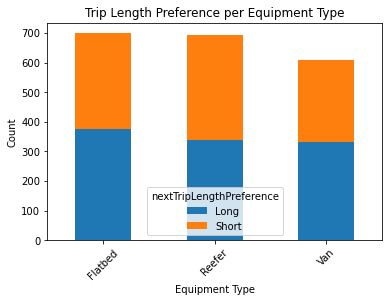

In [4]:
bar_data = df.groupby(['equipType', 'nextTripLengthPreference']).size().unstack()

# Plotting the bar chart
bar_data.plot(kind='bar', stacked=True)

plt.xlabel('Equipment Type')
plt.ylabel('Count')
plt.title('Trip Length Preference per Equipment Type')
plt.xticks(rotation=45)
plt.show()

In [5]:
df = pd.read_csv('notifications.csv')
df

,timestamp,id,price,estimated_profit,estimated_distance,estimated_wage,heuristic_wage,truck_id,load_id,type
0,2023-11-19T08:12:28,1,1650.0,364.367713,931.617600,25.422342,25.422342,101,10497,Notification
1,2023-11-19T08:38:02,2,1650.0,646.570482,727.122839,57.799149,57.799149,114,10497,Notification
2,2023-11-19T08:39:00,3,1600.0,407.147026,864.386213,30.616588,30.616588,144,10222,Notification
3,2023-11-19T08:41:08,4,1650.0,789.143466,623.809082,82.227603,82.058649,169,10497,Notification
4,2023-11-19T08:43:24,5,1650.0,874.153292,562.207760,101.065777,101.065777,185,10497,Notification
...,...,...,...,...,...,...,...,...,...,...
7640,2023-11-19T22:59:27,7641,465.0,236.816644,165.350258,93.093788,39.197670,290,10002,Notification
7641,2023-11-19T22:59:27,7642,800.0,585.364856,155.532713,244.634810,41.925521,290,10101,Notification
7642,2023-11-19T22:59:27,7643,730.4,493.226736,171.864684,186.540580,41.067747,290,10985,Notification
7643,2023-11-19T22:59:35,7644,2600.0,1175.414964,1032.307997,74.010831,41.949999,241,10141,Notification


In [6]:
serie = df['truck_id'].value_counts()
serie

160    97
378    96
163    93
315    91
137    89
       ..
420     1
237     1
274     1
221     1
306     1
Name: truck_id, Length: 241, dtype: int64

/Users/maique/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


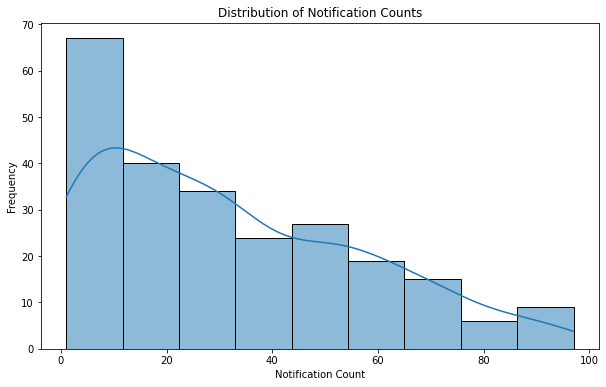

In [7]:
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 6))
sns.histplot(serie, kde=True)

plt.title('Distribution of Notification Counts')
plt.xlabel('Notification Count')
plt.ylabel('Frequency')
plt.show()

In [8]:
import pandas as pd

df['timestamp'] = pd.to_datetime(df['timestamp'])

grouped = df.groupby('truck_id')['timestamp'].agg(['max', 'min', 'size']).reset_index()

df_truck = pd.DataFrame({'truck_id': df['truck_id'].unique()})
df_truck = pd.merge(df_truck, grouped, how='left', on='truck_id')

df_truck = df_truck.rename(columns={'max': 'last_ping_time', 'min': 'first_ping_time', 'size': 'occurrences'})
df_truck['day_length'] = df_truck['last_ping_time'] - df_truck['first_ping_time']

df_truck

,truck_id,last_ping_time,first_ping_time,occurrences,day_length
0,101,2023-11-19 22:18:41,2023-11-19 08:12:28,59,0 days 14:06:13
1,114,2023-11-19 17:56:51,2023-11-19 08:38:02,46,0 days 09:18:49
2,144,2023-11-19 22:11:00,2023-11-19 08:39:00,33,0 days 13:32:00
3,169,2023-11-19 20:08:30,2023-11-19 08:41:08,56,0 days 11:27:22
4,185,2023-11-19 20:28:47,2023-11-19 08:43:24,29,0 days 11:45:23
...,...,...,...,...,...
236,429,2023-11-19 21:56:00,2023-11-19 21:00:55,15,0 days 00:55:05
237,416,2023-11-19 21:53:14,2023-11-19 21:48:14,2,0 days 00:05:00
238,382,2023-11-19 22:53:52,2023-11-19 21:58:48,4,0 days 00:55:04
239,340,2023-11-19 22:13:55,2023-11-19 22:13:55,2,0 days 00:00:00


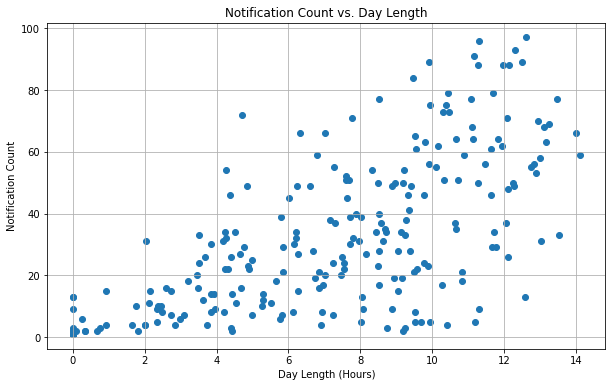

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(df_truck['day_length'].dt.total_seconds()/60/60, df_truck['occurrences'])
plt.xlabel('Day Length (Hours)')
plt.ylabel('Notification Count')
plt.title('Notification Count vs. Day Length')
plt.grid(True)
plt.show()

In [10]:
discarded_df = pd.read_csv('discarded_notifications.csv')
discarded_df

,timestamp,truck_id,load_id
0,2023-11-19 08:12:28,101,10380
1,2023-11-19 08:12:28,101,10022
2,2023-11-19 08:12:28,101,10742
3,2023-11-19 08:12:28,101,10211
4,2023-11-19 08:12:28,101,10020
...,...,...,...
737424,2023-11-19 22:59:56,237,10549
737425,2023-11-19 22:59:56,237,10372
737426,2023-11-19 22:59:56,237,10270
737427,2023-11-19 22:59:56,237,10032


In [11]:
discarded_count = discarded_df.groupby('truck_id').size().reset_index(name='discarded_amount')

df_truck = pd.merge(df_truck, discarded_count, how='left', on='truck_id')

In [12]:
df_truck

,truck_id,last_ping_time,first_ping_time,occurrences,day_length,discarded_amount
0,101,2023-11-19 22:18:41,2023-11-19 08:12:28,59,0 days 14:06:13,4625
1,114,2023-11-19 17:56:51,2023-11-19 08:38:02,46,0 days 09:18:49,2191
2,144,2023-11-19 22:11:00,2023-11-19 08:39:00,33,0 days 13:32:00,1991
3,169,2023-11-19 20:08:30,2023-11-19 08:41:08,56,0 days 11:27:22,2973
4,185,2023-11-19 20:28:47,2023-11-19 08:43:24,29,0 days 11:45:23,506
...,...,...,...,...,...,...
236,429,2023-11-19 21:56:00,2023-11-19 21:00:55,15,0 days 00:55:05,1981
237,416,2023-11-19 21:53:14,2023-11-19 21:48:14,2,0 days 00:05:00,4955
238,382,2023-11-19 22:53:52,2023-11-19 21:58:48,4,0 days 00:55:04,3415
239,340,2023-11-19 22:13:55,2023-11-19 22:13:55,2,0 days 00:00:00,1899


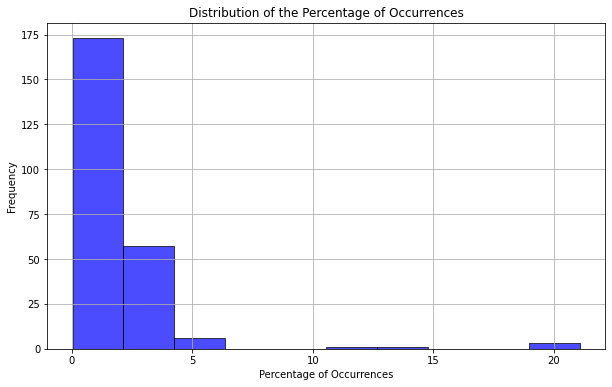

In [13]:
df_truck['percentage'] = (df_truck['occurrences'] / (df_truck['occurrences'] + df_truck['discarded_amount'])) * 100

# Plotting the distribution of these percentages
plt.figure(figsize=(10, 6))
plt.hist(df_truck['percentage'], bins=10, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Percentage of Occurrences')
plt.ylabel('Frequency')
plt.title('Distribution of the Percentage of Occurrences')
plt.grid(True)
plt.show()